In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [115]:
data = pd.read_csv(r"unnati_phase1_data_revised.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 6), markersize=1)

In [ ]:
data.hist(bins=25, figsize=(15, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [ ]:
data['Date'].nunique()

In [ ]:
x = data['Alert']
y = data['Speed']

# Create a scatter plot
plt.scatter(x, y, label='Scatter Plot', color='blue')

# Add labels and a title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatter Plot of X and Y')

# Show a legend (if needed)
plt.legend()

# Show the plot
plt.show()


In [ ]:
sns.displot(data['Alert'])

In [ ]:
sns.displot(data['Vehicle'])

In [ ]:
sns.displot(data['Speed'])

In [ ]:
sns.displot(data['Long'])

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data)

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='reg')

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='kde')

In [ ]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data,hue = 'Alert')

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data)
profile.to_file(output_file='data.html')

### Analysis

In [ ]:
import datetime as dt

In [89]:
df=data.copy()

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [91]:
df.head()

Alert        Date      Time        Lat       Long  Vehicle  Speed
0  cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48
1  cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58
2  cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57
3  cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49
4  cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58

In [92]:
df['DateTime']=df["Date"]+" "+df["Time"]

In [93]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format='%Y-%m-%d %H:%M:%S')

### Mapping

!pip install geopandas shapely

In [32]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [33]:
geometry = [Point(xy) for xy in zip(data['Long'], data['Lat'])]
gdf = GeoDataFrame(data, geometry = geometry)

(12.338685, 13.182797)

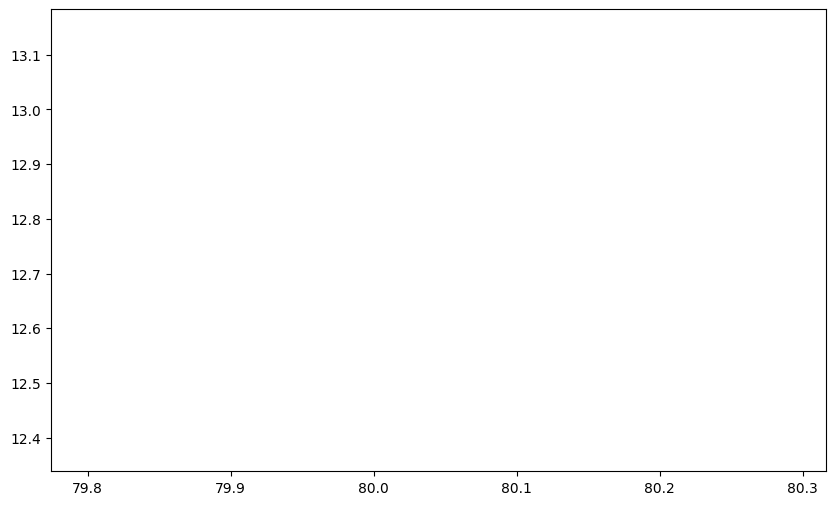

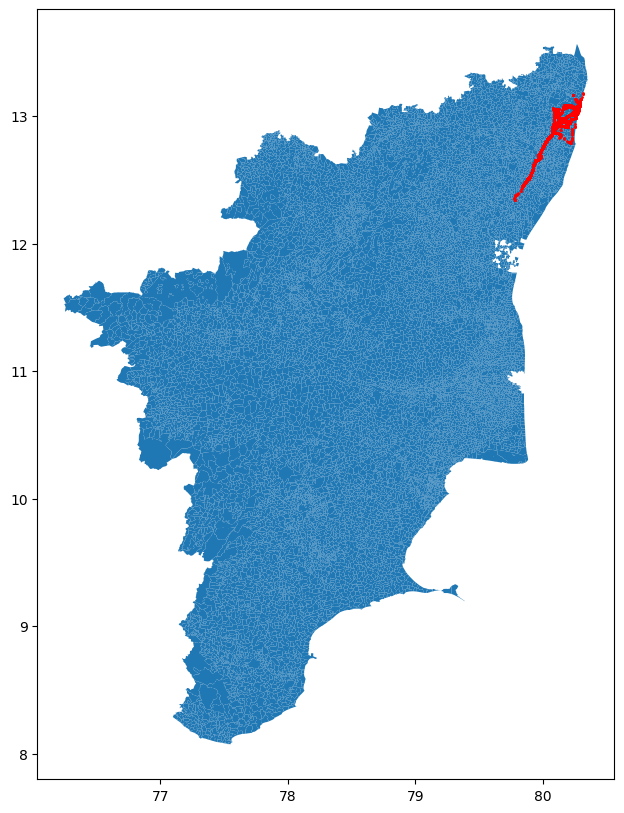

In [34]:
fig, ax = plt.subplots(figsize = (10,6))
world = gpd.read_file(r'C:\Users\akash\Desktop\nyu-2451-42207-shapefile\nyu_2451_42207.shp')
gdf.plot(ax = world.plot(figsize = (10, 10)), color = 'red', markersize = 1)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [35]:
gdf.total_bounds

array([79.77412 , 12.338685, 80.316079, 13.182797])

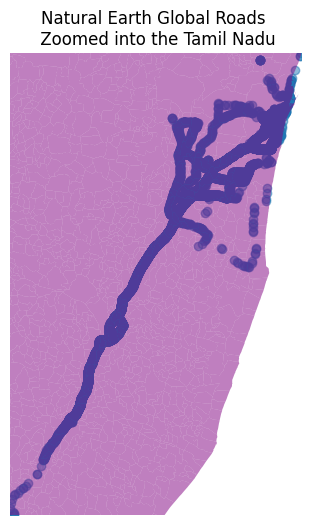

In [36]:
fig, ax = plt.subplots(figsize = (10,6))

xlim = ([gdf.total_bounds[0],  gdf.total_bounds[2]])
ylim = ([gdf.total_bounds[1], gdf.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf.plot(alpha = .5, ax = ax)
world.plot(color='purple', ax=ax, alpha=.5)

ax.set(title='Natural Earth Global Roads \n Zoomed into the Tamil Nadu')
ax.set_axis_off()
plt.show()

In [37]:
!pip install cartopy

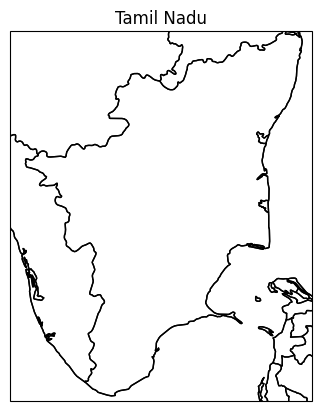

In [38]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Add a title to the map
ax.set_title('Tamil Nadu')

# Show the map
plt.show()


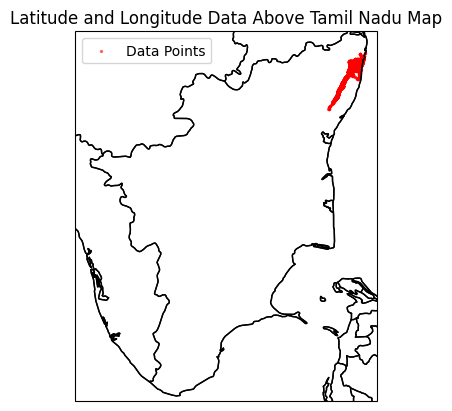

In [39]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=2, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Data Above Tamil Nadu Map')
plt.legend()

# Show the plot
plt.show()


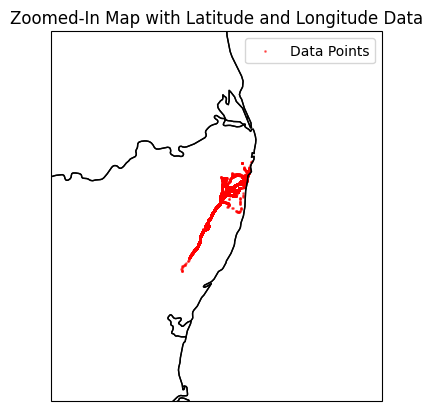

In [40]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Create a map projection centered around your data
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - 1, max_lon + 1, min_lat - 1, max_lat + 1])  # Adjust boundaries for zoom

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


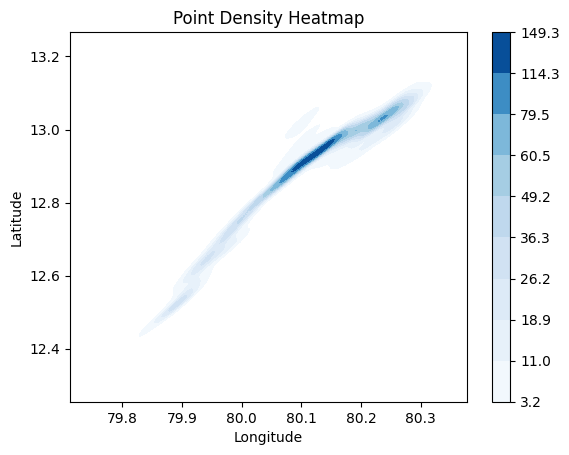

In [42]:
import seaborn as sns

# Create a heatmap of point density
sns.kdeplot(x=df['Long'], y=df['Lat'], cmap='Blues', fill=True, cbar=True)
plt.title('Point Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



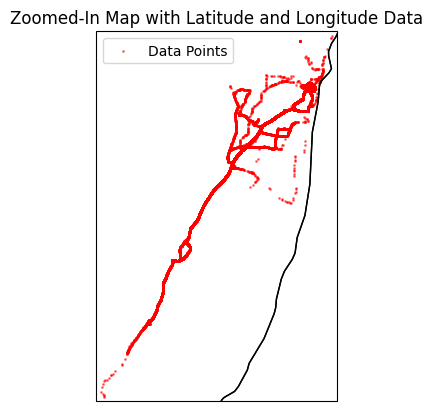

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd


# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Define a margin (adjust as needed) for a tighter zoom
margin = 0.01  # Example margin of 0.1 degrees

# Create a map projection centered around your data with a tighter zoom
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


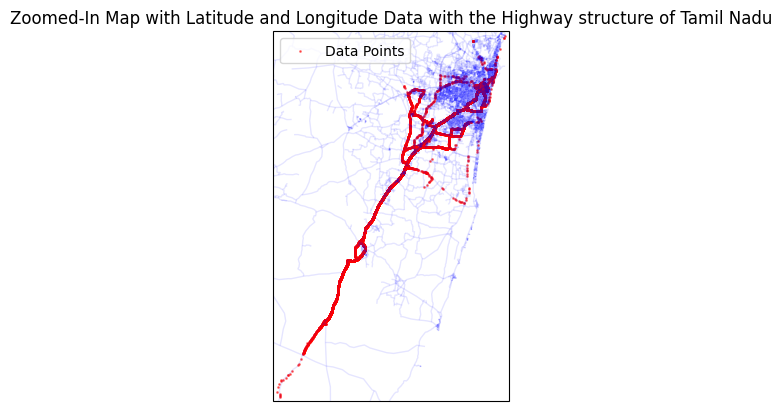

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')

# Determine the bounding box for your latitude and longitude data
min_lon = df['Long'].min()
max_lon = df['Long'].max()
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()

# Calculate the margin to add around the bounding box (adjust as needed)
margin = 0.01  # Example margin of 0.01 degrees

# Create a map projection centered around the bounding box with the margin
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Zoomed-In Map with Latitude and Longitude Data with the Highway structure of Tamil Nadu')
plt.legend()

# Show the plot
plt.show()


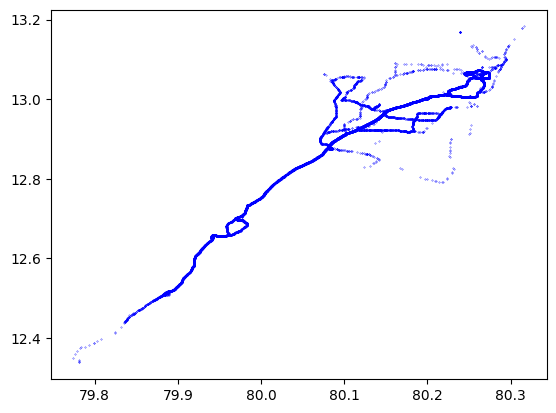

In [48]:
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [49]:


# Specify the column containing the unique values
unique_column = 'Alert'  # Replace with your actual column name

# Group the data by the unique values in the specified column
grouped = df.groupby(unique_column)

# Iterate over groups and create separate CSV files
for group_name, group_data in grouped:
    # Create a new DataFrame for the group
    group_df = pd.DataFrame(group_data)
    
    # Generate a CSV file name based on the unique value
    csv_file_name = f'{group_name}.csv'
    
    # Save the group data to the CSV file
    group_df.to_csv(csv_file_name, index=False)

# Print a message to confirm the process is complete
print("CSV files created for each unique value.")


CSV files created for each unique value.


In [54]:
data['Vehicle'].nunique()

5

In [50]:


# Specify the column containing the unique values
unique_column = 'Vehicle'  # Replace with your actual column name

# Group the data by the unique values in the specified column
grouped = df.groupby(unique_column)

# Iterate over groups and create separate CSV files
for group_name, group_data in grouped:
    # Create a new DataFrame for the group
    group_df = pd.DataFrame(group_data)
    
    # Generate a CSV file name based on the unique value
    csv_file_name = f'{group_name}.csv'
    
    # Save the group data to the CSV file
    group_df.to_csv(csv_file_name, index=False)

# Print a message to confirm the process is complete
print("CSV files created for each unique value.")


CSV files created for each unique value.


### Separate plottings
Meanings of each unique value in the alertcolumn:<br>
**FCW**: forward collision warning -improves driver alertness to rear end coliision events
<br>
**PCW**: Pedestrian collision warning - Improves driver alertness to vulnerable road users
<br>
**HMW**: Headway monitoring & Warning - Helps driver main safe distance from vehicle 
<br>
**LDW**: Lane departure warning - Promotes lane discipline (use turn indicator before changing routes)

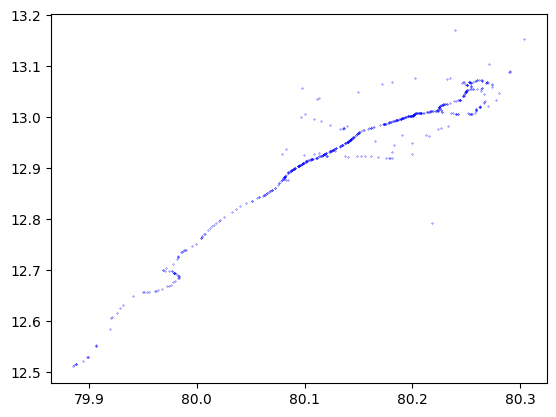

In [47]:
data = pd.read_csv(r"cas_fcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [48]:
data['Speed'].describe()

count    590.000000
mean      36.366102
std       14.121527
min        0.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       63.000000
Name: Speed, dtype: float64

Text(0.5, 1.0, 'Overall plot')

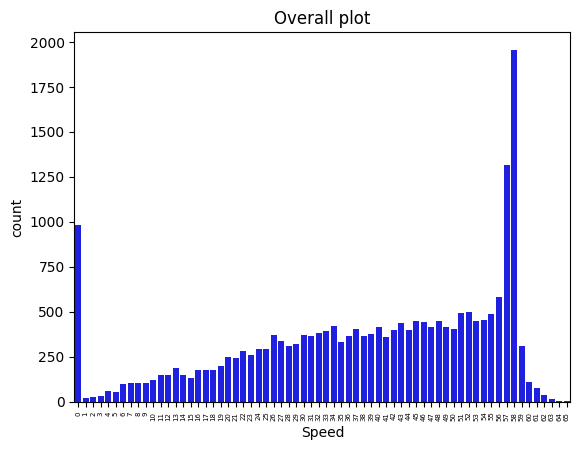

In [116]:
filtered_data = data['Speed']

# Create a count plot for the filtered data
ax = sns.countplot(data=data, x='Speed', color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=5)
plt.title('Overall plot')

Text(0.5, 1.0, 'for FCW')

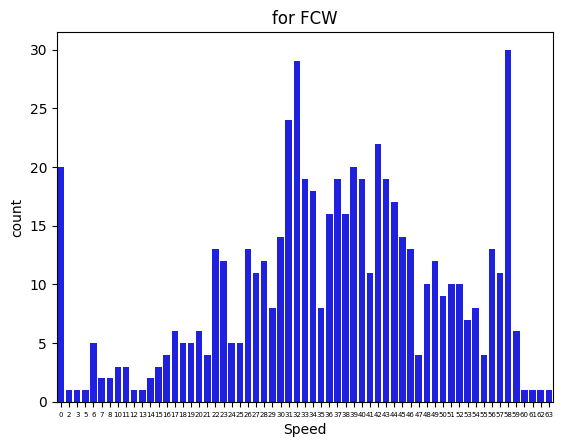

In [109]:
data=pd.read_csv('cas_fcw.csv')
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)
plt.title('for FCW')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(3

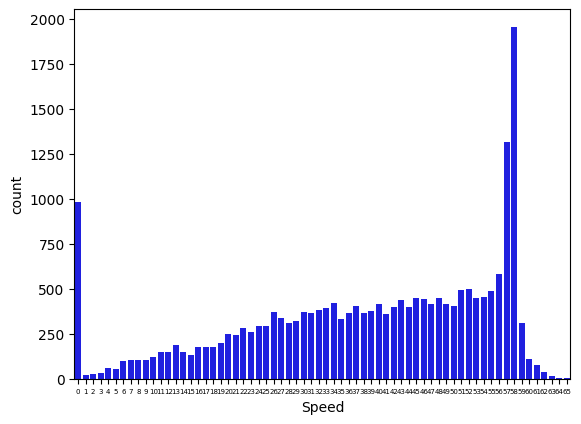

In [96]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

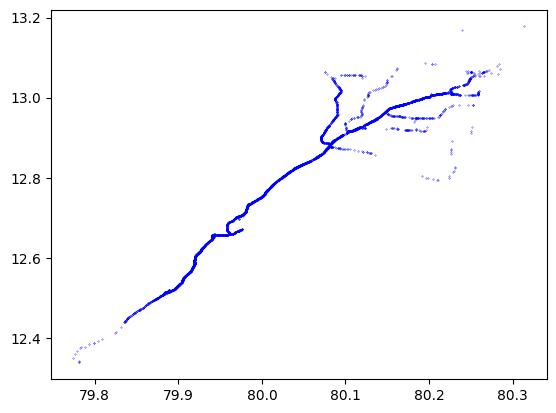

In [59]:
data = pd.read_csv(r"cas_ldw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

Text(0.5, 1.0, 'for LDW')

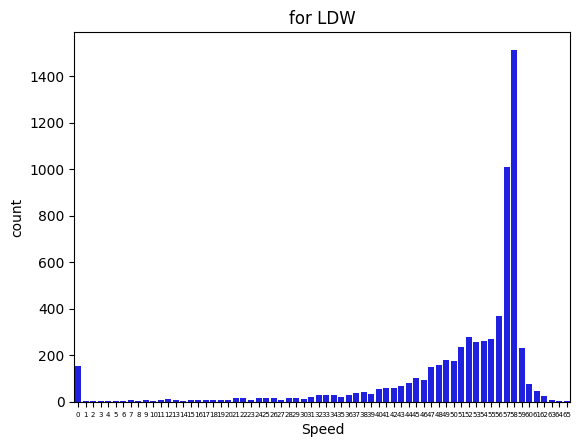

In [112]:

data = pd.read_csv(r"cas_ldw.csv")
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)
plt.title('for LDW')

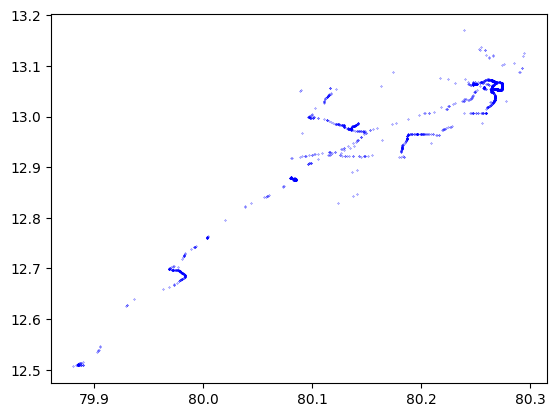

In [61]:
data = pd.read_csv(r"cas_pcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

Text(0.5, 1.0, 'for PCW')

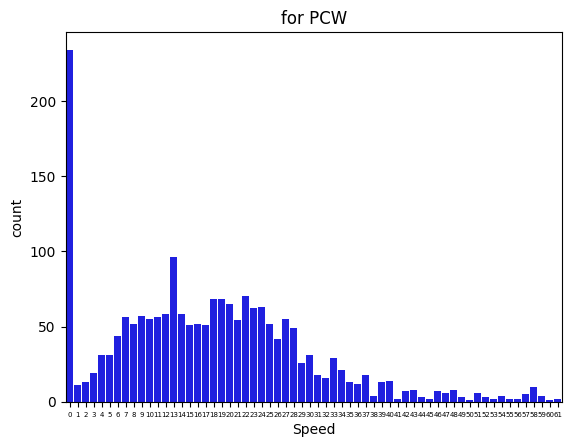

In [111]:
data = pd.read_csv(r"cas_pcw.csv")
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)
plt.title('for PCW')

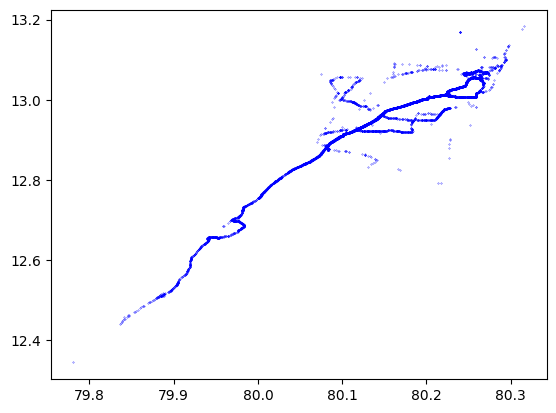

In [51]:
data = pd.read_csv(r"cas_hmw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

Text(0.5, 1.0, 'for HMW')

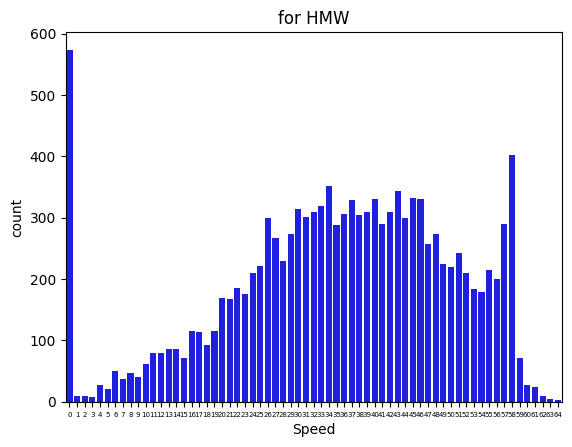

In [113]:
data=pd.read_csv('cas_hmw.csv')
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)
plt.title('for HMW')

In [64]:
grouped_df = df.groupby('Time') 
grouped_df

In [96]:
data['hour'] = pd.to_datetime(data['Time']).dt.hour

In [98]:
hourly_counts = data.groupby('hour')['Alert'].count().reset_index()


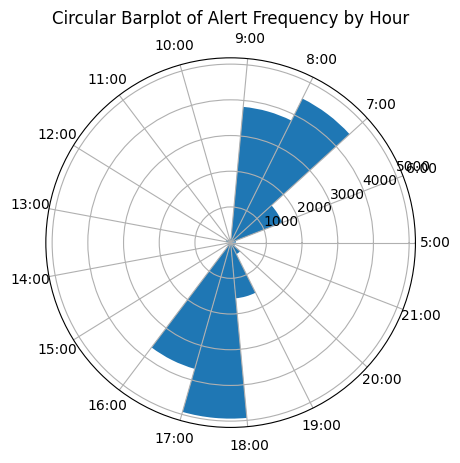

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency by Hour")
plt.show()


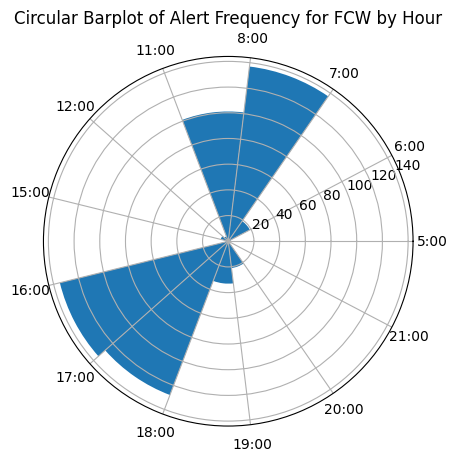

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency for FCW by Hour")
plt.show()


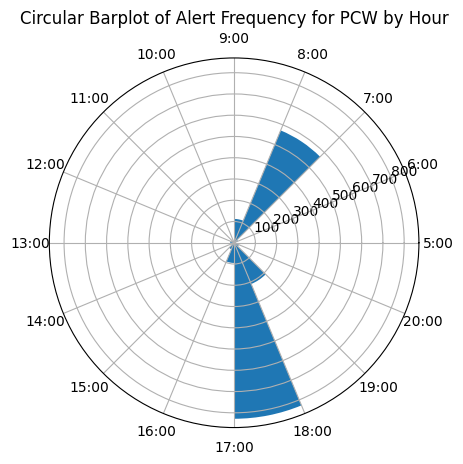

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"cas_pcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency for PCW by Hour")
plt.show()


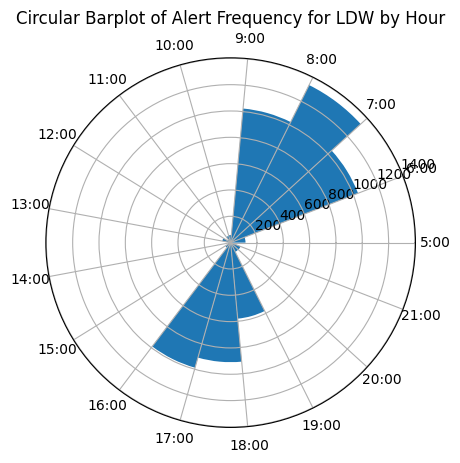

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"cas_ldw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency for LDW by Hour")
plt.show()


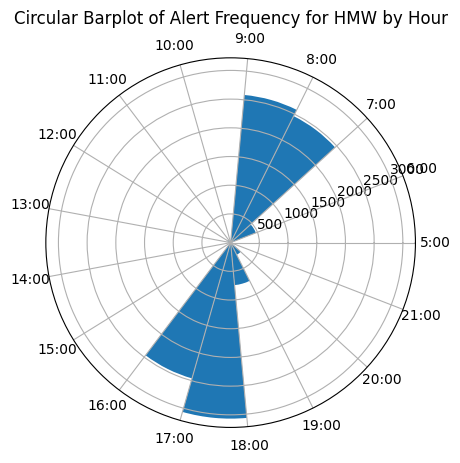

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"cas_hmw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency for HMW by Hour")
plt.show()


In [118]:
data = pd.read_csv(r"cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()
hourly_counts

5       2
6      19
7     137
8     101
11      4
12      6
15      2
16    135
17    128
18     33
19     21
20      1
21      1
Name: hour, dtype: int64

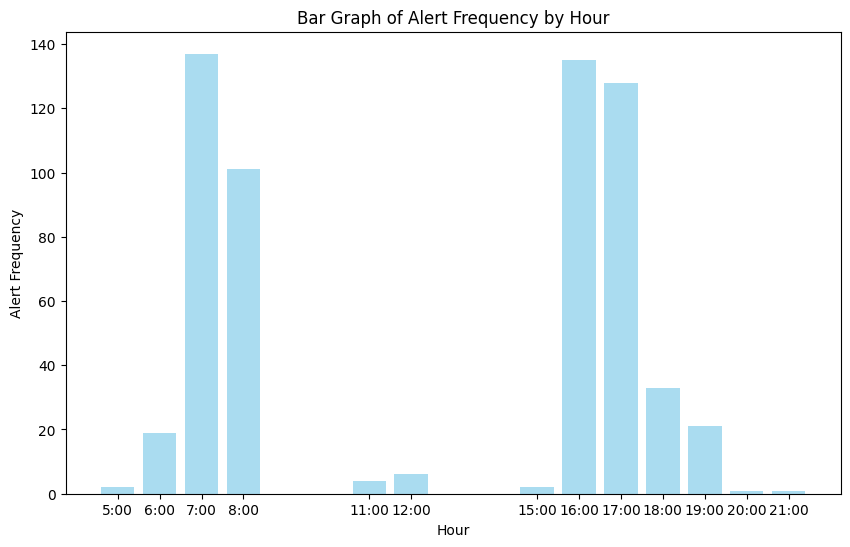

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', alpha=0.7)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency by Hour')

# Customize the x-axis tick labels (if needed)
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
plt.xticks(hourly_counts.index, hour_labels)

# Show the plot
plt.show()


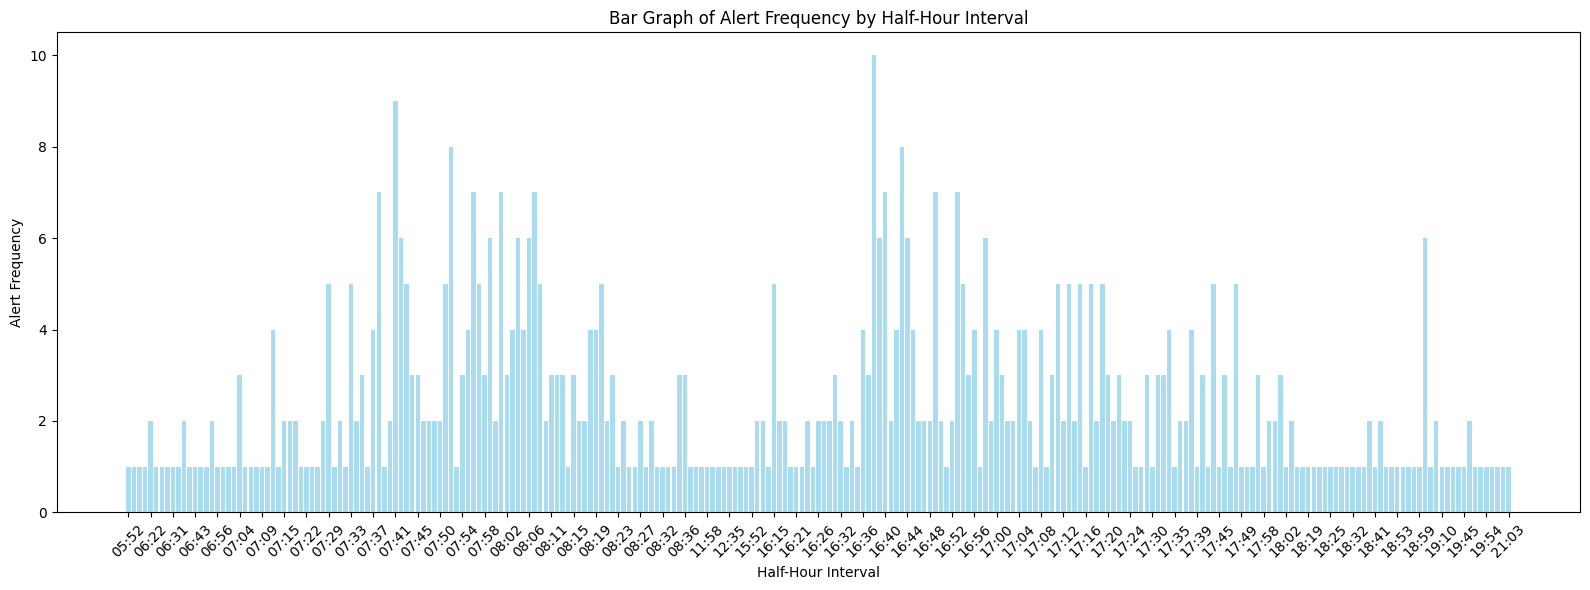

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Extract the hour and minute components from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour
data['minute'] = pd.to_datetime(data['Time']).dt.minute

# Calculate the frequency of alerts for each half-hour interval
half_hourly_counts = data.groupby(['hour', 'minute']).size().reset_index(name='count')

# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the bars
plt.bar(
    range(len(half_hourly_counts)),
    half_hourly_counts['count'],
    color='skyblue',
    alpha=0.7
)

# Set labels and title
plt.xlabel('Half-Hour Interval')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency by Half-Hour Interval')

# Customize the x-axis tick labels to include all half-hour intervals
half_hour_labels = [
    f"{hour:02d}:{minute:02d}" for hour, minute in zip(half_hourly_counts['hour'], half_hourly_counts['minute'])
]
plt.xticks(range(0, len(half_hourly_counts), 4), half_hour_labels[::4], rotation=45)


# Show the plot
plt.tight_layout()
plt.show()


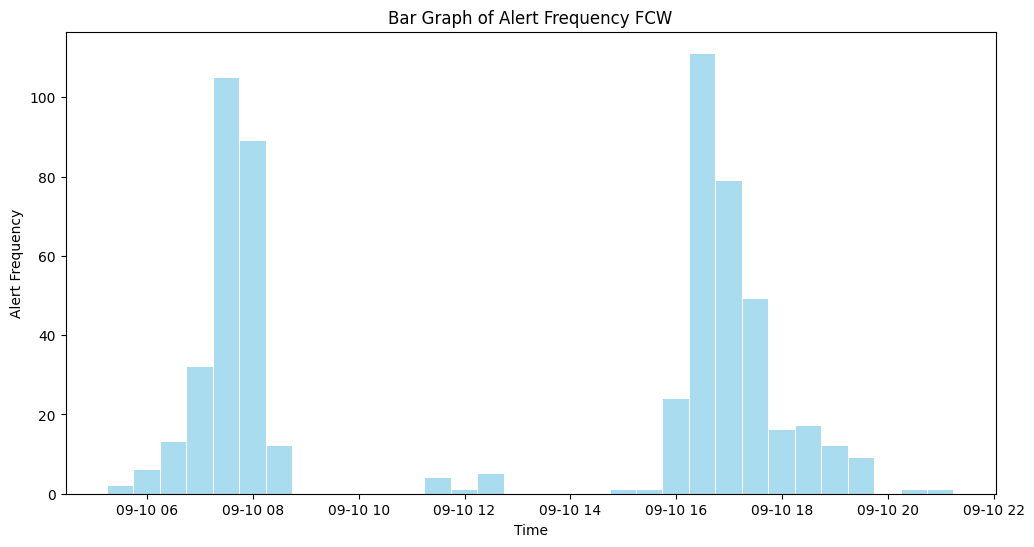

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency FCW')

# Show the plot
plt.show()


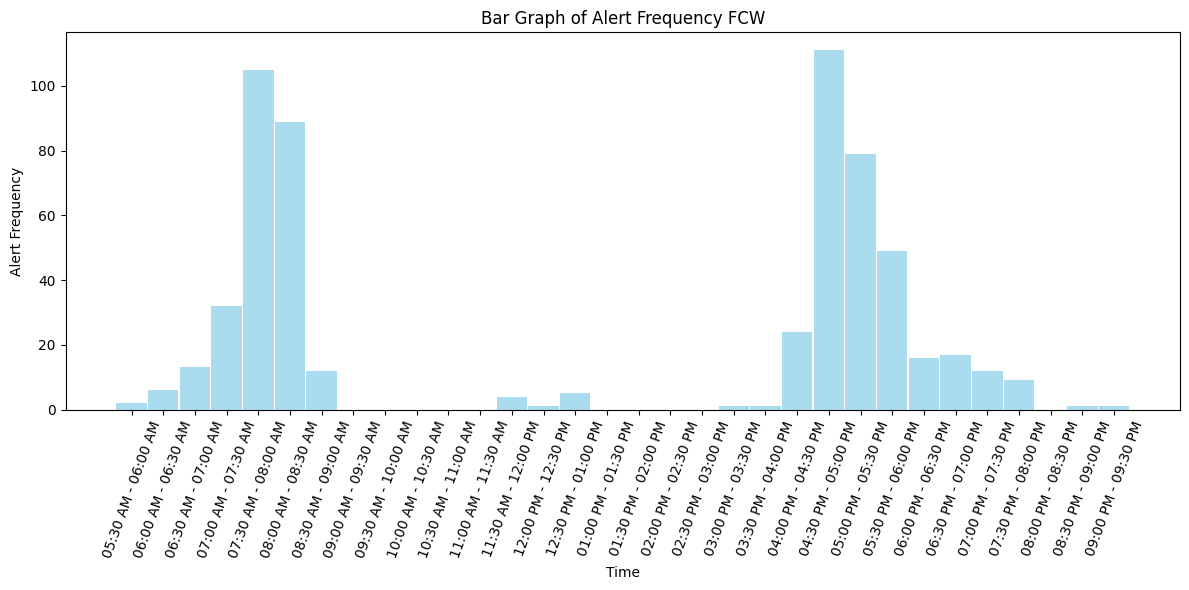

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency FCW')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


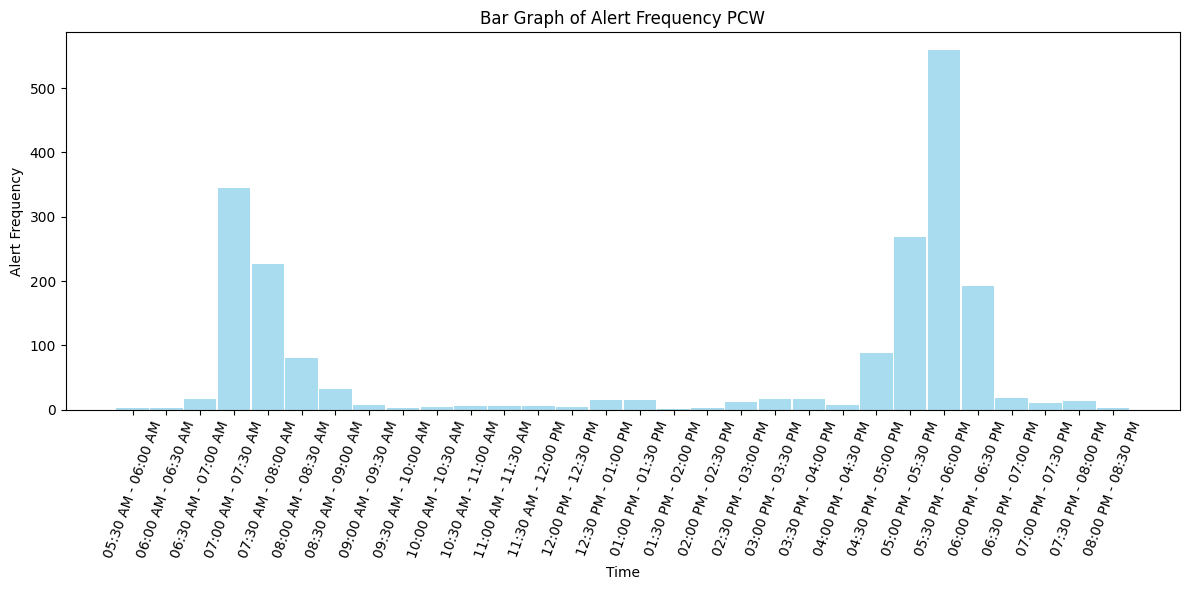

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_pcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency PCW')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


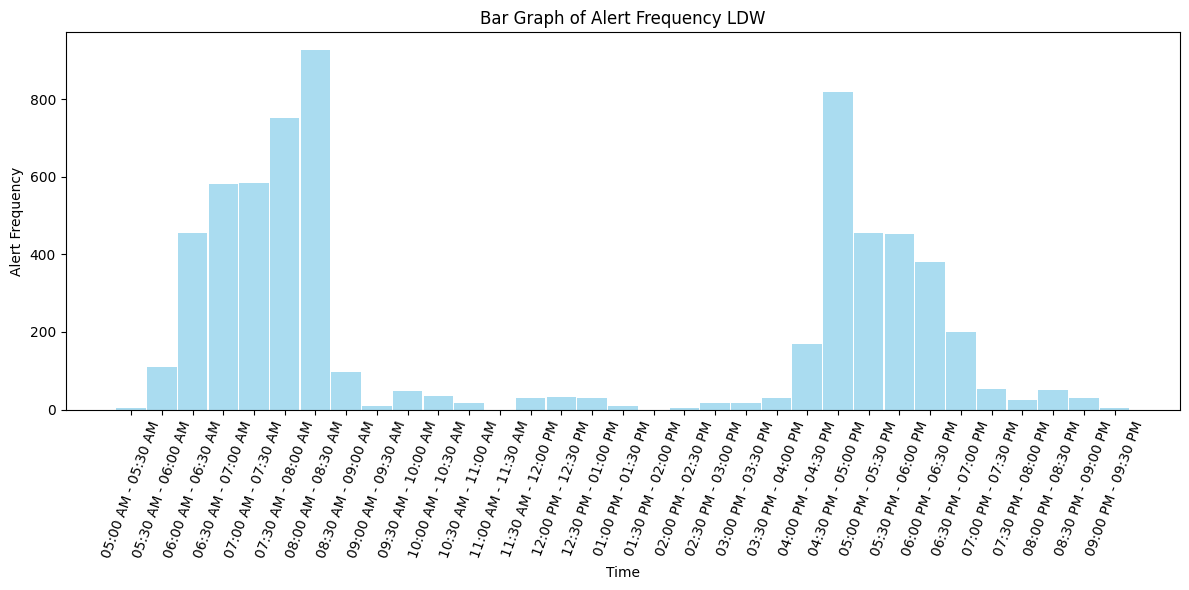

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_ldw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency LDW')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


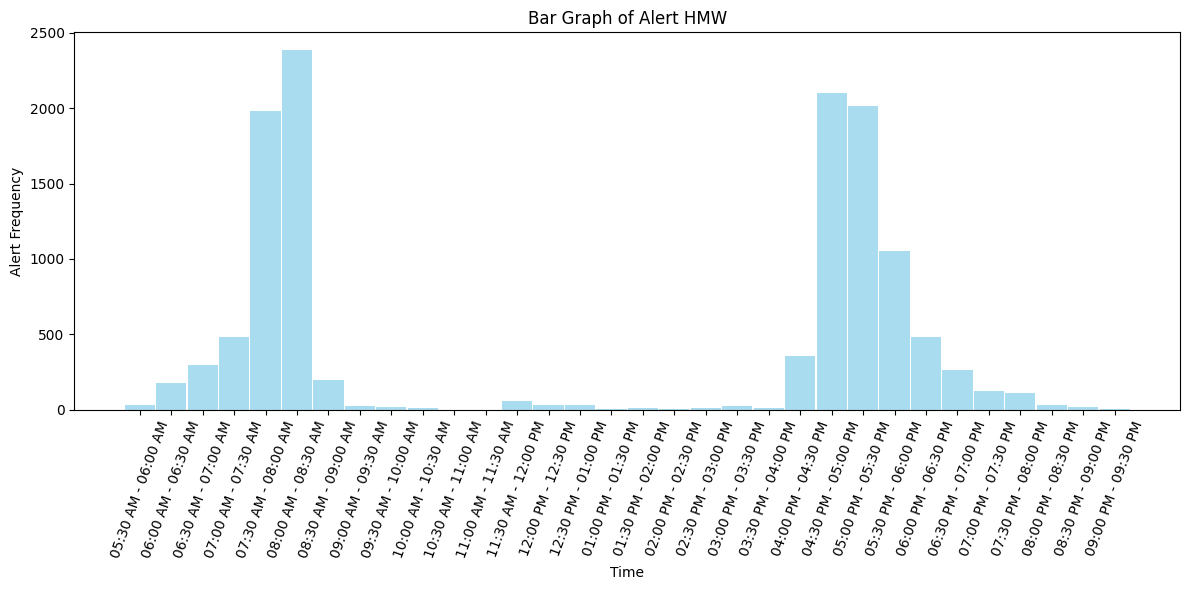

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_hmw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert HMW')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


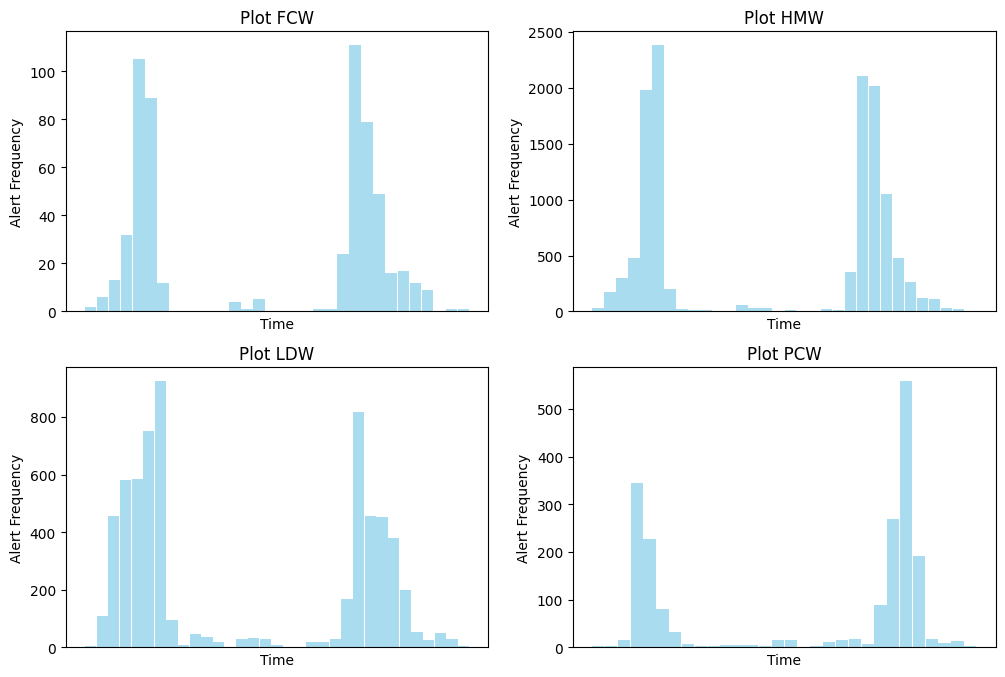

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create four different plots (you can replace these with your actual plots)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
axs[0, 0].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,
    color='skyblue',
    alpha=0.7
)

axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Alert Frequency')
axs[0, 0].set_title('Plot FCW')
axs[0, 0].set_xticks([])
# Plot 2
# Add your code for the second plot here
data = pd.read_csv("cas_hmw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[0,1].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Alert Frequency')
axs[0, 1].set_title('Plot HMW')
# Customize the x-axis tick labels

axs[0, 1].set_xticks([])
# Plot 3
# Add your code for the third plot here
data = pd.read_csv("cas_ldw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[1,0].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Alert Frequency')
axs[1, 0].set_title('Plot LDW')
axs[1, 0].set_xticks([])
# Plot 4
# Add your code for the fourth plot here
data = pd.read_csv("cas_pcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[1,1].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Alert Frequency')
axs[1, 1].set_title('Plot PCW')
axs[1, 1].set_xticks([])
# Adjust spacing between subplots
plt.tight_layout()

# Show all plots together
plt.show()


In [23]:
import folium
import pandas as pd


# Create a map centered around Tamil Nadu
m = folium.Map(location=[11.1271, 78.6569], zoom_start=7)

# Add bubble markers for each data point
for index, row in data.iterrows():
    # Extract data for each point
    speed = row['Speed']
    latitude = row['Lat']
    longitude = row['Long']
    accident_type = row['Alert']
    if accident_type == 'High':
        color = 'red'
    elif accident_type == 'Medium':
        color = 'yellow'
    else:
        color = 'green'
    # Create a bubble marker
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5 + speed / 5,  # Adjust the radius based on speed or as needed
        color='red',  # Customize the color based on accident type or as needed
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Accident Type: {accident_type}<br>Speed: {speed} km/h",
    ).add_to(m)

# Save the map to an HTML file
m.save('bubble_map_tamil_nadu.html')


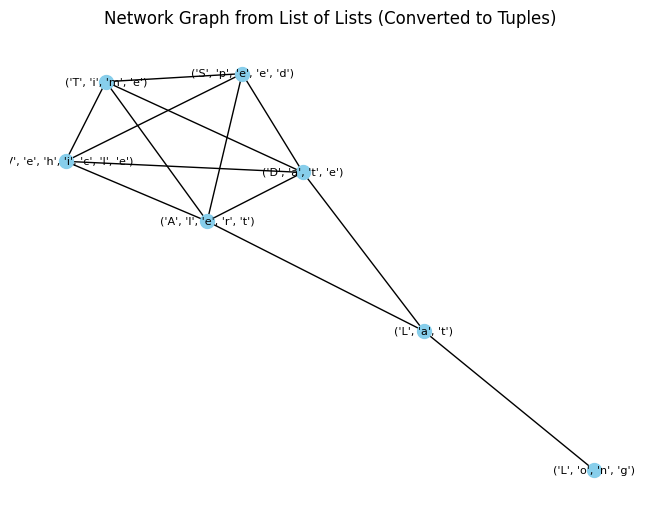

In [5]:
import networkx as nx
import matplotlib.pyplot as plt


# Create an empty graph
G = nx.Graph()

# Iterate through the list of lists and create nodes
for entity_list in data:
    entity_tuple = tuple(entity_list)
    G.add_node(entity_tuple)

# Define criteria to create edges (connections) between nodes
# For example, you can create an edge between nodes if they share a common element
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 != node2 and set(node1).intersection(node2):
            G.add_edge(node1, node2)

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
plt.title('Network Graph from List of Lists (Converted to Tuples)')
plt.show()


In [ ]:
data.info()

In [7]:
data['Count'] = data.groupby('Alert')['Alert'].transform('count')

# Create a sunburst chart
fig = px.sunburst(
    data,
    path=['Alert'],  # Use the 'Alert' column as the top-level category
    values='Count',  # Virtual count column based on frequency
    title='Alert Sunburst Chart'
)

fig.show()



In [75]:
fcw_count = (data['Alert'] == 'cas_fcw').sum()

print("Number of times 'FCW' appears in the 'Alert' column:", fcw_count)
pcw_count = (data['Alert'] == 'cas_pcw').sum()

print("Number of times 'PCW' appears in the 'Alert' column:", pcw_count)
ldw_count = (data['Alert'] == 'cas_ldw').sum()

print("Number of times 'LDW' appears in the 'Alert' column:", ldw_count)
hmw_count = (data['Alert'] == 'cas_hmw').sum()

print("Number of times 'HMW' appears in the 'Alert' column:", hmw_count)

Number of times 'FCW' appears in the 'Alert' column: 590
Number of times 'PCW' appears in the 'Alert' column: 1976
Number of times 'LDW' appears in the 'Alert' column: 6431
Number of times 'HMW' appears in the 'Alert' column: 12328


In [36]:
import folium
from folium.plugins import MarkerCluster

# Sample data (assuming you have a list of lists called 'data')
# Each list should contain [Lat, Long, Alert]

# Center the map at the approximate center of Tamil Nadu
center_lat = 11.1271
center_long = 78.6569
m = folium.Map(location=[center_lat, center_long], zoom_start=8)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each accident
for accident in data:
    folium.Marker(
        location=[accident[0], accident[1]],  # Assuming Lat is at index 0 and Long is at index 1
        popup=accident[2],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_map.html')



In [131]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('cas_fcw.csv')

# Assuming your DataFrame has columns named 'Lat', 'Long', and 'Alert'
# Center the map at the approximate center of Tamil Nadu
center_lat = 11.1271
center_long = 78.6569
m = folium.Map(location=[center_lat, center_long], zoom_start=8)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each accident
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Alert'],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_mapFCW.html')


In [132]:
import folium
from folium.plugins import MarkerCluster
data=pd.read_csv('cas_ldw.csv')
# Sample data (assuming you have a list of lists called 'data')
# Each list should contain [Lat, Long, Alert]

# Center the map at the approximate center of Tamil Nadu
center_lat = 11.1271
center_long = 78.6569
m = folium.Map(location=[center_lat, center_long], zoom_start=8)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each accident
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Alert'],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_mapLDW.html')

In [133]:
import folium
from folium.plugins import MarkerCluster
data=pd.read_csv('cas_pcw.csv')
# Sample data (assuming you have a list of lists called 'data')
# Each list should contain [Lat, Long, Alert]

# Center the map at the approximate center of Tamil Nadu
center_lat = 11.1271
center_long = 78.6569
m = folium.Map(location=[center_lat, center_long], zoom_start=8)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each accident
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Alert'],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_mapPCW.html')

In [134]:
import folium
from folium.plugins import MarkerCluster
data=pd.read_csv('cas_hmw.csv')
# Sample data (assuming you have a list of lists called 'data')
# Each list should contain [Lat, Long, Alert]

# Center the map at the approximate center of Tamil Nadu
center_lat = 11.1271
center_long = 78.6569
m = folium.Map(location=[center_lat, center_long], zoom_start=8)  # Adjust the zoom level as needed

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each accident
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['Alert'],  # Customize the popup content
    ).add_to(marker_cluster)

# Display the map
m.save('cluster_mapHMW.html')

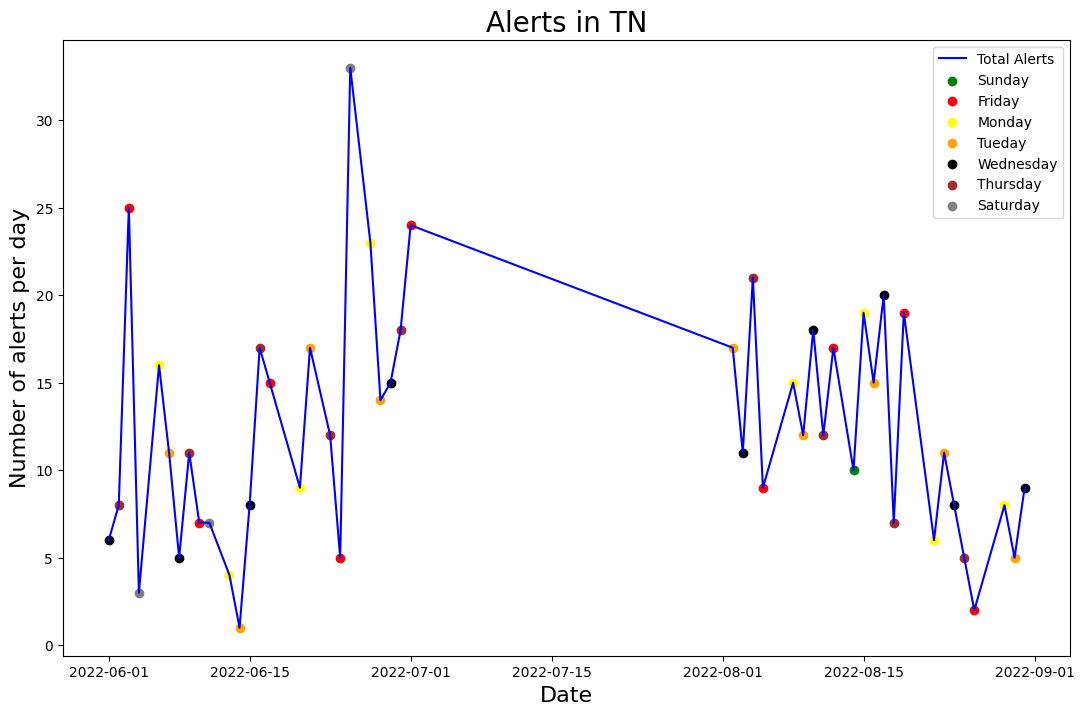

In [125]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a column named 'Date'
# If 'Date' is a datetime column, you can access its date part using '.dt.date'
# Make sure the column names are consistent with your DataFrame
data=pd.read_csv('cas_fcw.csv')
data['Date']=pd.to_datetime(data['Date'])
# Total accidents per day
accidents = data.groupby(data['Date'].dt.date).count().Date
accidents.plot(figsize=(13, 8), color='blue', label='Total Alerts')

# Sunday accidents
sundays = data[data['Date'].dt.dayofweek == 6].groupby(data['Date'].dt.date).count().Date
plt.scatter(sundays.index, sundays, color='green', label='Sunday')

# Friday accidents
fridays = data[data['Date'].dt.dayofweek == 4].groupby(data['Date'].dt.date).count().Date
plt.scatter(fridays.index, fridays, color='red', label='Friday')
Mondays = data[data['Date'].dt.dayofweek == 0].groupby(data['Date'].dt.date).count().Date
plt.scatter(Mondays.index, Mondays, color='yellow', label='Monday')
Tuedays = data[data['Date'].dt.dayofweek == 1].groupby(data['Date'].dt.date).count().Date
plt.scatter(Tuedays.index, Tuedays, color='orange', label='Tueday')
Wednesdays = data[data['Date'].dt.dayofweek == 2].groupby(data['Date'].dt.date).count().Date
plt.scatter(Wednesdays.index, Wednesdays, color='black', label='Wednesday')
Thursdays = data[data['Date'].dt.dayofweek == 3].groupby(data['Date'].dt.date).count().Date
plt.scatter(Thursdays.index, Thursdays, color='brown', label='Thursday')
Saturdays = data[data['Date'].dt.dayofweek == 5].groupby(data['Date'].dt.date).count().Date
plt.scatter(Saturdays.index, Saturdays, color='grey', label='Saturday')
# Title, x label, and y label
plt.title('Alerts in TN', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of alerts per day', fontsize=16)
plt.legend()
plt.show()


In [77]:
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])

In [94]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd

# Create a map object of the city of Barcelona
map = folium.Map(location=[11.1271,78.6569], zoom_start=8)

# Assuming you have a DataFrame called df with a column 'DateTime' containing datetime values
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Nested list that contains the latitude and longitude of the different accidents and their respective hours
hour_list = [[] for _ in range(24)]
for lat, log, hour in zip(df['Lat'], df['Long'], df['DateTime'].dt.hour):
    hour_list[hour].append([lat, log])

# Labels indicating the hours
index = [str(i) + ' Hours' for i in range(24)]

# Instantiate a heat map with time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(map)

map


In [79]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd
df=pd.read_csv('cas_fcw.csv')
# Create a map object of the city of Barcelona
map = folium.Map(location=[11.1271,78.6569], zoom_start=8)

# Assuming you have a DataFrame called df with a column 'DateTime' containing datetime values
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Nested list that contains the latitude and longitude of the different accidents and their respective hours
hour_list = [[] for _ in range(24)]
for lat, log, hour in zip(df['Lat'], df['Long'], df['DateTime'].dt.hour):
    hour_list[hour].append([lat, log])

# Labels indicating the hours
index = [str(i) + ' Hours' for i in range(24)]

# Instantiate a heat map with time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(map)

map


In [80]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd
df=pd.read_csv('cas_pcw.csv')
# Create a map object of the city of Barcelona
map = folium.Map(location=[11.1271,78.6569], zoom_start=8)

# Assuming you have a DataFrame called df with a column 'DateTime' containing datetime values
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Nested list that contains the latitude and longitude of the different accidents and their respective hours
hour_list = [[] for _ in range(24)]
for lat, log, hour in zip(df['Lat'], df['Long'], df['DateTime'].dt.hour):
    hour_list[hour].append([lat, log])

# Labels indicating the hours
index = [str(i) + ' Hours' for i in range(24)]

# Instantiate a heat map with time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(map)

map


In [81]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd
df=pd.read_csv('cas_ldw.csv')
# Create a map object of the city of Barcelona
map = folium.Map(location=[11.1271,78.6569], zoom_start=8)

# Assuming you have a DataFrame called df with a column 'DateTime' containing datetime values
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Nested list that contains the latitude and longitude of the different accidents and their respective hours
hour_list = [[] for _ in range(24)]
for lat, log, hour in zip(df['Lat'], df['Long'], df['DateTime'].dt.hour):
    hour_list[hour].append([lat, log])

# Labels indicating the hours
index = [str(i) + ' Hours' for i in range(24)]

# Instantiate a heat map with time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(map)

map


In [82]:
from folium.plugins import HeatMapWithTime
import folium
import pandas as pd
df=pd.read_csv('cas_hmw.csv')
# Create a map object of the city of Barcelona
map = folium.Map(location=[11.1271,78.6569], zoom_start=8)

# Assuming you have a DataFrame called df with a column 'DateTime' containing datetime values
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Nested list that contains the latitude and longitude of the different accidents and their respective hours
hour_list = [[] for _ in range(24)]
for lat, log, hour in zip(df['Lat'], df['Long'], df['DateTime'].dt.hour):
    hour_list[hour].append([lat, log])

# Labels indicating the hours
index = [str(i) + ' Hours' for i in range(24)]

# Instantiate a heat map with time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(map)

map
